In [24]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import tarfile

%load_ext autoreload
%autoreload 2
    
#runALU.ITER9000.PARALLEL1.ROUND1

NROUND=3
NPARALLEL=88


#NROUND=1
#NPARALLEL=1
df_dict = {
    'round': [], 
    'parallel': [], 
    'iter': [], 
    'kepler_container_bpf_block_irq_total': [], 
    'kepler_container_bpf_cpu_time_ms_total': [], 
    'kepler_container_bpf_net_rx_irq_total': [], 
    'kepler_container_bpf_net_tx_irq_total': [], 
    'kepler_container_bpf_page_cache_hit_total': [], 
    'kepler_container_cache_miss_total': [], 
    
    'dynamic_kepler_container_core_joules_total': [], 
    'idle_kepler_container_core_joules_total': [], 
    
    'kepler_container_cpu_cycles_total': [], 
    'kepler_container_cpu_instructions_total': [], 
    
    'kepler_container_dram_joules_total': [],
    'dynamic_kepler_container_dram_joules_total': [], 
    'idle_kepler_container_dram_joules_total': [], 

    'kepler_container_gpu_joules_total': [], 
    'dynamic_kepler_container_gpu_joules_total': [], 
    'idle_kepler_container_gpu_joules_total': [], 

    'kepler_container_joules_total': [], 
    'dynamic_kepler_container_joules_total': [], 
    'idle_kepler_container_joules_total': [], 

    'kepler_container_other_joules_total': [], 
    'dynamic_kepler_container_other_joules_total': [], 
    'idle_kepler_container_other_joules_total': [], 

    'kepler_container_package_joules_total': [], 
    'dynamic_kepler_container_package_joules_total': [], 
    'idle_kepler_container_package_joules_total': [], 

    'kepler_container_platform_joules_total': [],
    'dynamic_kepler_container_platform_joules_total': [], 
    'idle_kepler_container_platform_joules_total': [], 
    
    'kepler_container_task_clock_ms_total': [], 

    'kepler_container_uncore_joules_total': [], 
    'dynamic_kepler_container_uncore_joules_total': [], 
    'idle_kepler_container_uncore_joules_total': [],

    'kepler_node_dram_joules_total': [],
    'dynamic_kepler_node_dram_joules_total': [],
    'idle_kepler_node_dram_joules_total': [],

    'kepler_node_other_joules_total': [],
    'dynamic_kepler_node_other_joules_total': [],
    'idle_kepler_node_other_joules_total': [],

    'kepler_node_package_joules_total': [],
    'dynamic_kepler_node_package_joules_total': [],
    'idle_kepler_node_package_joules_total': [],

    'kepler_node_platform_joules_total': [],
    'dynamic_kepler_node_platform_joules_total': [],
    'idle_kepler_node_platform_joules_total': [],

    'kepler_node_core_joules_total': [],
    'dynamic_kepler_node_core_joules_total': [],
    'idle_kepler_node_core_joules_total': [],

    'kepler_node_uncore_joules_total': [],
    'dynamic_kepler_node_uncore_joules_total': [],
    'idle_kepler_node_uncore_joules_total': []
}

def reset():
    for key in df_dict:
        df_dict[key] = []

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
reset()
tar = tarfile.open("../results/results.tar.gz")
fs = f"results/runALU.ITER9000.PARALLEL1.ROUND0.START"
fss=tar.extractfile(fs)
content=fss.read()
decoded_content = content.decode("utf-8")
for line in decoded_content.split("\n"):
    if len(line) > 0 and line.startswith('#'):
        continue
    if "kepler_node" in line:
        print(line)
        name = (line.split(' ')[0]).split('{')[0]
        val = float(line.split(' ')[1])
        if "dynamic" in line:
            if len(df_dict[f"dynamic_{name}"]) == 0:
                df_dict[f"dynamic_{name}"].append(val)
            else:
                df_dict[f"dynamic_{name}"][-1] += val
        elif "idle" in line:
            if len(df_dict[f"idle_{name}"]) == 0:
                df_dict[f"idle_{name}"].append(val)
            else:
                df_dict[f"idle_{name}"][-1] += val
                    
        #print(name, val)
#print(df_dict)
#df = pd.DataFrame(df_dict)
#dfnonzero = df.loc[:, (df != 0.0).any(axis=0)]
#dfnonzero

kepler_node_core_joules_total{instance="kube-worker-68",mode="dynamic",package="0",source="intel_rapl"} 0
kepler_node_core_joules_total{instance="kube-worker-68",mode="dynamic",package="1",source="intel_rapl"} 0
kepler_node_core_joules_total{instance="kube-worker-68",mode="dynamic",package="2",source="intel_rapl"} 0
kepler_node_core_joules_total{instance="kube-worker-68",mode="dynamic",package="3",source="intel_rapl"} 0
kepler_node_dram_joules_total{instance="kube-worker-68",mode="dynamic",package="0",source="intel_rapl"} 445286.401
kepler_node_dram_joules_total{instance="kube-worker-68",mode="dynamic",package="1",source="intel_rapl"} 546531.05
kepler_node_dram_joules_total{instance="kube-worker-68",mode="dynamic",package="2",source="intel_rapl"} 357754.978
kepler_node_dram_joules_total{instance="kube-worker-68",mode="dynamic",package="3",source="intel_rapl"} 520777.416
kepler_node_dram_joules_total{instance="kube-worker-68",mode="idle",package="0",source="intel_rapl"} 7.565757523e+06


In [40]:
reset()
tar = tarfile.open("../results/results.tar.gz")

for round in range(0, NROUND):
    for para in range(1, 88+1):
        fs = f"results/runALU.ITER9000.PARALLEL{para}.ROUND{round}.START"
        fe = f"results/runALU.ITER9000.PARALLEL{para}.ROUND{round}.END"
        df_dict['round'].append(round)
        df_dict['parallel'].append(para)
        df_dict['iter'].append(9000)

        fee=tar.extractfile(fe)
        content=fee.read()
        decoded_content = content.decode("utf-8")

        kepler_node_dram_joules_totalE = 0.0
        kepler_node_dram_joules_totalS = 0.0

        kepler_node_package_joules_totalE = 0.0
        kepler_node_package_joules_totalS = 0.0

        kepler_node_other_joules_totalE = 0.0
        kepler_node_other_joules_totalS = 0.0

        kepler_node_platform_joules_totalE = 0.0
        kepler_node_platform_joules_totalS = 0.0

        for line in decoded_content.split("\n"):
            if len(line) > 0 and line.startswith('#'):
                continue
            if "microbench" in line:
                name = (line.split(' ')[0]).split('{')[0]
                val = float(line.split(' ')[1])
                if "dynamic" in line:
                    df_dict[f"dynamic_{name}"].append(val)
                elif "idle" in line:
                    df_dict[f"idle_{name}"].append(val)
                else:
                    df_dict[name].append(val)
            elif 'kepler_node_dram_joules_total' in line:
                kepler_node_dram_joules_totalE += float(line.split(' ')[1])
            elif 'kepler_node_package_joules_total' in line:
                kepler_node_package_joules_totalE += float(line.split(' ')[1])
            elif 'kepler_node_other_joules_total' in line:
                kepler_node_other_joules_totalE += float(line.split(' ')[1])
            elif 'kepler_node_platform_joules_total' in line:
                kepler_node_platform_joules_totalE += float(line.split(' ')[1])

        fss=tar.extractfile(fs)
        content=fss.read()
        decoded_content = content.decode("utf-8")
        for line in decoded_content.split("\n"):
            if len(line) > 0 and line.startswith('#'):
                continue
            if "microbench" in line:
                name = (line.split(' ')[0]).split('{')[0]
                val = float(line.split(' ')[1])
                if "dynamic" in line:
                    df_dict[f"dynamic_{name}"][-1] = df_dict[f"dynamic_{name}"][-1] - val
                elif "idle" in line:
                    df_dict[f"idle_{name}"][-1] = df_dict[f"idle_{name}"][-1] - val
                else:
                    df_dict[name][-1] = df_dict[name][-1] - val
                
            elif 'kepler_node_dram_joules_total' in line:
                kepler_node_dram_joules_totalS += float(line.split(' ')[1])
            elif 'kepler_node_package_joules_total' in line:
                kepler_node_package_joules_totalS += float(line.split(' ')[1])
            elif 'kepler_node_other_joules_total' in line:
                kepler_node_other_joules_totalS += float(line.split(' ')[1])
            elif 'kepler_node_platform_joules_total' in line:
                kepler_node_platform_joules_totalS += float(line.split(' ')[1])
        df_dict['kepler_node_dram_joules_total'].append(kepler_node_dram_joules_totalE - kepler_node_dram_joules_totalS)
        df_dict['kepler_node_package_joules_total'].append(kepler_node_package_joules_totalE - kepler_node_package_joules_totalS)
        df_dict['kepler_node_other_joules_total'].append(kepler_node_other_joules_totalE - kepler_node_other_joules_totalS)
        df_dict['kepler_node_platform_joules_total'].append(kepler_node_platform_joules_totalE - kepler_node_platform_joules_totalS)
                


In [61]:
#print(df_dict)

nlen = len(df_dict['round'])
           
new_dict = {key: val for key, 
            val in df_dict.items() if len(val) == nlen}
            
#print(new_dict)

df = pd.DataFrame(new_dict)
dfnonzero = df.loc[:, (df != 0.0).any(axis=0)]
dfnonzero
print(dfnonzero.columns)


Index(['round', 'parallel', 'iter', 'kepler_container_bpf_net_rx_irq_total',
       'kepler_container_cache_miss_total',
       'kepler_container_cpu_cycles_total',
       'kepler_container_cpu_instructions_total',
       'dynamic_kepler_container_dram_joules_total',
       'idle_kepler_container_dram_joules_total',
       'dynamic_kepler_container_joules_total',
       'idle_kepler_container_joules_total',
       'dynamic_kepler_container_package_joules_total',
       'idle_kepler_container_package_joules_total',
       'idle_kepler_container_platform_joules_total',
       'kepler_container_task_clock_ms_total', 'kepler_node_dram_joules_total',
       'kepler_node_package_joules_total',
       'kepler_node_platform_joules_total'],
      dtype='object')


In [62]:
dfnonzero['kepler_container_joules_total'] = dfnonzero['dynamic_kepler_container_joules_total'] + dfnonzero['idle_kepler_container_joules_total']

dfnonzero['kepler_container_package_joules_total'] = dfnonzero['dynamic_kepler_container_package_joules_total'] + dfnonzero['idle_kepler_container_package_joules_total']
dfnonzero['kepler_container_dram_joules_total'] = dfnonzero['dynamic_kepler_container_dram_joules_total'] + dfnonzero['idle_kepler_container_dram_joules_total']
print(dfnonzero.columns)
dfnonzero

Index(['round', 'parallel', 'iter', 'kepler_container_bpf_net_rx_irq_total',
       'kepler_container_cache_miss_total',
       'kepler_container_cpu_cycles_total',
       'kepler_container_cpu_instructions_total',
       'dynamic_kepler_container_dram_joules_total',
       'idle_kepler_container_dram_joules_total',
       'dynamic_kepler_container_joules_total',
       'idle_kepler_container_joules_total',
       'dynamic_kepler_container_package_joules_total',
       'idle_kepler_container_package_joules_total',
       'idle_kepler_container_platform_joules_total',
       'kepler_container_task_clock_ms_total', 'kepler_node_dram_joules_total',
       'kepler_node_package_joules_total', 'kepler_node_platform_joules_total',
       'kepler_container_joules_total',
       'kepler_container_package_joules_total',
       'kepler_container_dram_joules_total'],
      dtype='object')


/tmp/ipykernel_2592204/2256199580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnonzero['kepler_container_joules_total'] = dfnonzero['dynamic_kepler_container_joules_total'] + dfnonzero['idle_kepler_container_joules_total']
/tmp/ipykernel_2592204/2256199580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnonzero['kepler_container_package_joules_total'] = dfnonzero['dynamic_kepler_container_package_joules_total'] + dfnonzero['idle_kepler_container_package_joules_total']
/tmp/ipykernel_2592204/2

,round,parallel,iter,kepler_container_bpf_net_rx_irq_total,kepler_container_cache_miss_total,kepler_container_cpu_cycles_total,kepler_container_cpu_instructions_total,dynamic_kepler_container_dram_joules_total,idle_kepler_container_dram_joules_total,dynamic_kepler_container_joules_total,...,dynamic_kepler_container_package_joules_total,idle_kepler_container_package_joules_total,idle_kepler_container_platform_joules_total,kepler_container_task_clock_ms_total,kepler_node_dram_joules_total,kepler_node_package_joules_total,kepler_node_platform_joules_total,kepler_container_joules_total,kepler_container_package_joules_total,kepler_container_dram_joules_total
0,0,1,9000,253.0,149804153.0,7.359938e+10,4.477691e+10,748.248,215.262,3043.0,...,2294.787,214.050,0.543,68142.0,6299.259,8247.013,17.16,3472.0,2508.837,963.510
1,0,2,9000,587.0,139525580.0,1.400637e+11,8.343522e+10,762.156,245.385,4509.0,...,3746.622,244.017,0.612,127506.0,6113.856,9316.974,16.50,4999.0,3990.639,1007.541
2,0,3,9000,936.0,129737233.0,2.011294e+11,1.287070e+11,757.071,292.485,5659.0,...,4901.535,290.958,0.741,177876.0,5921.787,10319.749,15.84,6242.0,5192.493,1049.556
3,0,4,9000,1216.0,308602346.0,2.537405e+11,1.672527e+11,835.755,333.294,7257.0,...,6421.464,331.518,0.852,224952.0,5727.547,11506.620,15.18,7922.0,6752.982,1169.049
4,0,5,9000,1545.0,464778792.0,2.919226e+11,1.902320e+11,1006.008,427.785,7966.0,...,6960.039,425.433,1.101,287856.0,6720.757,12967.733,17.82,8819.0,7385.472,1433.793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2,84,9000,3129.0,154367651.0,5.653083e+11,5.061520e+11,1030.269,2752.944,21355.0,...,20324.700,2738.358,6.375,966344.0,7364.953,26677.717,19.14,26846.0,23063.058,3783.213
260,2,85,9000,3666.0,292732698.0,7.116943e+11,5.970096e+11,1130.775,2702.199,21385.0,...,20253.915,2685.114,6.246,1202900.0,7117.365,26328.599,18.48,26773.0,22939.029,3832.974
261,2,86,9000,4125.0,250371014.0,7.281956e+11,5.990291e+11,1122.111,2711.619,21494.0,...,20372.097,2696.316,6.288,1178828.0,7361.006,26662.008,19.14,26902.0,23068.413,3833.730
262,2,87,9000,6150.0,329731968.0,1.052483e+12,8.809220e+11,1129.209,2788.572,21824.0,...,20694.093,2771.970,6.555,1594666.0,7352.177,27050.809,19.14,27385.0,23466.063,3917.781


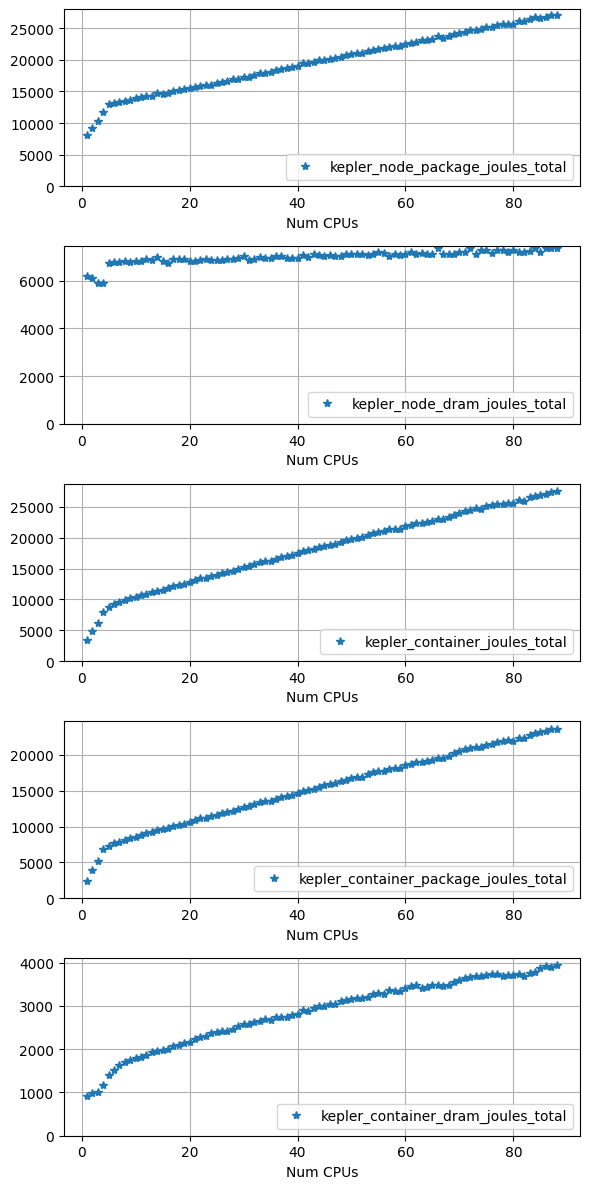

In [63]:
metrics = [
    'kepler_node_package_joules_total',
    'kepler_node_dram_joules_total',
    'kepler_container_joules_total',
    'kepler_container_package_joules_total',
    'kepler_container_dram_joules_total'
]

fig, axs = plt.subplots(len(metrics), 1, figsize=(6, 12))
for i, ax in enumerate(axs.flat):
    m = dfnonzero.groupby('parallel')[metrics[i]].mean()
    ax.errorbar(m.index, m, fmt="*", label=f"{metrics[i]}")
    ax.set_xlabel('Num CPUs')
    ax.set_ylim(bottom=0)
    ax.grid(True)
    ax.legend(loc='lower right')
plt.tight_layout()
plt.show()


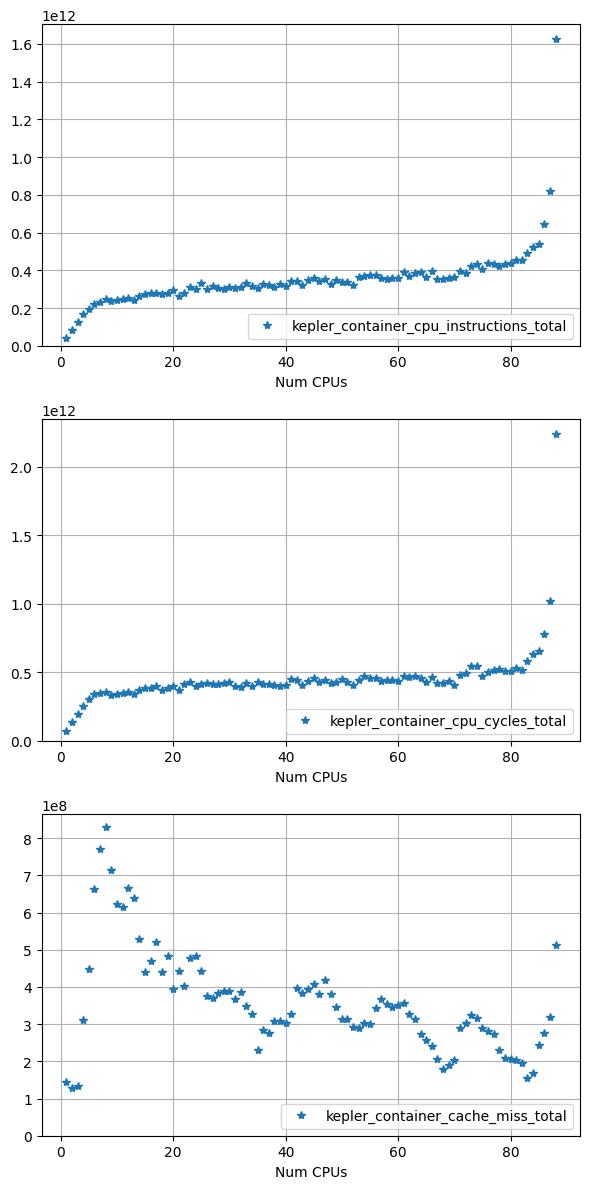

In [44]:
metrics = [
    'kepler_container_cpu_instructions_total',
    'kepler_container_cpu_cycles_total',
    'kepler_container_cache_miss_total'
]

fig, axs = plt.subplots(len(metrics), 1, figsize=(6, 12))
for i, ax in enumerate(axs.flat):
    m = df.groupby('parallel')[metrics[i]].mean()
    ax.errorbar(m.index, m, fmt="*", label=f"{metrics[i]}")
    ax.set_xlabel('Num CPUs')
    ax.set_ylim(bottom=0)
    ax.grid(True)
    ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
metrics = [
    'kepler_node_platform_joules_total',
    'kepler_node_package_joules_total',
    'kepler_node_dram_joules_total',
    'kepler_container_cpu_instructions_total',
    'kepler_container_cache_miss_total',
    'kepler_container_cpu_cycles_total',
    'dynamic_kepler_container_package_joules_total',
    'idle_kepler_container_package_joules_total',
    'idle_kepler_container_platform_joules_total',
    'dynamic_kepler_container_joules_total',
    'idle_kepler_container_joules_total',
    'dynamic_kepler_container_dram_joules_total',
    'idle_kepler_container_dram_joules_total',
]

fig, axs = plt.subplots(len(metrics), 1, figsize=(6, 24))
for i, ax in enumerate(axs.flat):
    m = df.groupby('parallel')[metrics[i]].mean()
    ax.errorbar(m.index, m, fmt="*", label=f"{metrics[i]}")
    ax.set_xlabel('Num CPUs')
    ax.set_ylim(bottom=0)
    ax.grid(True)
    ax.legend(loc='lower right')
plt.tight_layout()
plt.show()